# DOPPIA FENDITURA

Nel nostro caso lo schermo misurava l'ampiezza del campo elettrico su una superficie __circolare__

TODO: misure fenditura e posizione dei componenti
- $\sigma_V$ = oscillazione strumento
- $\sigma_\theta$ = 1°

In [23]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import jax.numpy as jnp
import os
import sys

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')

from giopy import Interpolazione, final_val

dir_path = os.path.abspath('')
FILE = dir_path + '/data/' + 'fenditura2.csv'
fr = pd.read_csv(FILE)

In [24]:
θ = (np.array(fr['angolo (°)']) - 90) * np.pi/180
sigmaθ = np.ones_like(θ) * np.pi/180
V = np.array(fr['V (mV)']) * 10**-3
sigmaV = np.array(fr['sigmaV (mV)']) * 10**-3

## FENDITURE DI YOUNG

il campo elettrico (che per una singola fenditura centrata nell'origine sarabbe costante lungo tutto lo schermo) presenta un'andamento sinusoidale.

L'ampiezza dei picchi sarebbe uguale a tutti gli angoli se lo schermo fosse piatto, visto che il nostro schermo è sferico osserviamo un'andamento di tipo coseno


__NOTA:__ osserviamo solo il fenomeno di interferenza fra le due onde, la diffrazione non si nota perchè è funzione dell'intensità dell'onda non dell'ampiezza del campo elettrico


__FUNZIONE FENDITURA__

$E_{tot} = E_1 + E_2 = E_0 [\cos(kr_1) + \cos(kr_2)] \quad k = \frac{2\pi}{\lambda}$



┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 680.1                      │              Nfcn = 161              │
│ EDM = 1.05e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ E0   │    1.0    │    0.5    │            │            │         │         │       │
│ 1 │ R    │ 500.10e-3 │  0.12e-3  │            │            │         │         │       │
│ 2 │ d    │  0.0000   │  0.0017   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬───────────────────────────────┐
│    │        E0         R         d │
├────┼───────────────────────────────┤
│ E0 │     0.279 63.025e-6    2.4e-6 │
│  R │ 63.025e-6  1.42e-08  0.001e-6 │
│  d │    2.4e-6  0.001e-6  2.77e-06 │
└────┴───────────────────────────────┘

----------------- VALORI FIT: -----------------
E0: 1.013 ± 0.529 
R: (5.001 ± 0.001)e-1 
d: (5.372 ± 1664.37)e-6 

dof: 26
chi2: 680.11
chi2 ridotto: 26.16
pvalue: 0.0
------------------------------------------------



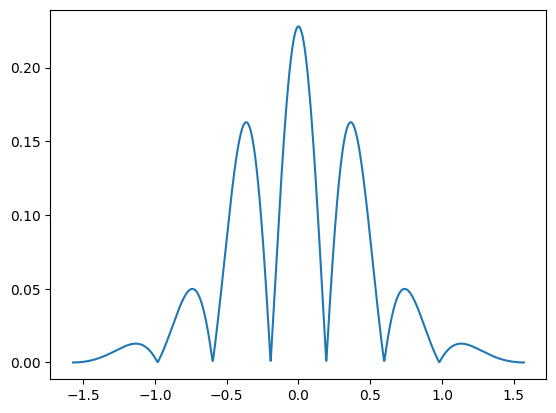

In [26]:
# def funzione_couscous(θ,A,B,m):
    #return jnp.abs(A*(jnp.cos(θ)**2) *jnp.cos(m*θ) + B*jnp.cos(θ) *jnp.cos(m*θ))

def funzione_couscous(θ,E0,R,d):
    k = 2*np.pi/0.028187499999999997
    r1 = jnp.sqrt((R*jnp.sin(θ)-d/2)**2 + (R*jnp.cos(θ))**2)
    r2 = jnp.sqrt((R*jnp.sin(θ)+d/2)**2 + (R*jnp.cos(θ))**2)

    return E0 * jnp.abs(jnp.cos(k*r1)/r1 + jnp.cos(k*r2)/r2) * jnp.cos(θ)**2


x = np.linspace(-np.pi/2,np.pi/2,1000)
y = funzione_couscous(x,0.288,0.5,0.07)

plt.plot(x,y)

fit_couscous = Interpolazione(θ,V,sigmaθ,sigmaV,funzione_couscous,[0.288,0.5,0.03],names=['E0','R','d'],iteration=1)
display(fit_couscous.m)
print(fit_couscous)

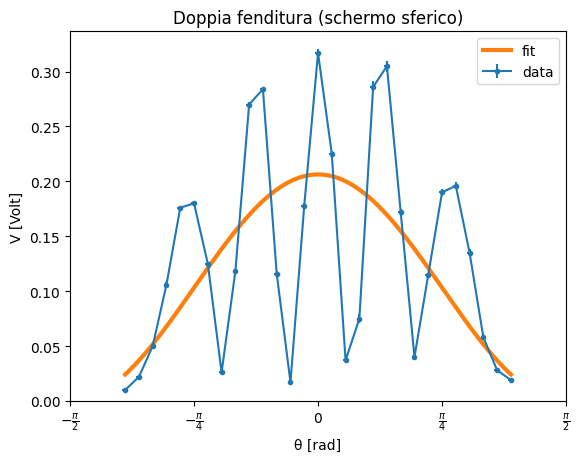

In [27]:
plt.errorbar(θ,V,yerr=sigmaV,xerr=sigmaθ,fmt='.-',label='data')

# x = np.linspace(-np.pi/2,np.pi/2,1000)
# y =( np.cos(x)**2) *fit_couscous.values['A']

# plt.plot(x,y, label='$V_0 \\cos^2(x)$')
plt.plot(*fit_couscous.draw(),label='fit',linewidth=3)

plt.ylim(0)
plt.xlim(-np.pi/2,np.pi/2)
plt.ylabel('V [Volt]')
plt.xlabel('θ [rad]')
plt.title('Doppia fenditura (schermo sferico)')
plt.xticks([-np.pi/2,-np.pi/4,0,np.pi/4,np.pi/2],[r'$-\frac{\pi}{2}$',r'$-\frac{\pi}{4}$',r'$0$',r'$\frac{\pi}{4}$',r'$\frac{\pi}{2}$'])
plt.legend()
plt.show()

### CONSIDERAZIONI:

Il fit è qualitativamente attedibile

Nelle code la stima è meno efficiente, la causa può essere il modello rudimentale che trascura la dipendenza $\frac{1}{r}$